In [6]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [7]:
extra_words = ['']
stopwords_extra = STOPWORDS.update(extra_words)

In [ ]:
# wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
#               width=800, height=400, collocations=False)
# wc.generate(sum_string)
# plt.imshow(wc, interpolation='bilinear')
# plt.axis('off')
# plt.title('Skills word cloud [python]')

In [ ]:
# words_fc = pd.Series(wc.words_)
# words_fc =  np.ceil(words_fc * len(skills_clean))
# words_fc[:20].plot.bar()
# plt.title('skills frequency bar chart')

In [22]:
df_path = 'dataframes/cleaned_soul_10.csv'

In [15]:
# import os
# os.getcwd()
# os.chdir('..')
# os.getcwd()

In [23]:
df = pd.read_csv(df_path, index_col = 0)

In [24]:
df.head()

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image
0,Al Green,Let’s Stay Together,Let's Stay Together by Al Green,NaN,1971.0,11.0,NaN,279512,https://genius.com/Al-green-lets-stay-together...,0,1,3,39 contributorslet’s stay together lyrics let'...,https://s3.amazonaws.com/rapgenius/algreen_wid...
1,Al Green,Love and Happiness,Love and Happiness by Al Green,1972-10-23,1972.0,10.0,23.0,74572,https://genius.com/Al-green-love-and-happiness...,0,1,2,16 contributorslove and happiness lyrics love ...,https://s3.amazonaws.com/rapgenius/algreen_wid...
2,Al Green,How Can You Mend a Broken Heart?,How Can You Mend a Broken Heart? by Al Green,1972-01-31,1972.0,1.0,31.0,72266,https://genius.com/Al-green-how-can-you-mend-a...,0,1,3,28 contributorshow can you mend a broken heart...,https://s3.amazonaws.com/rapgenius/algreen_wid...
3,Al Green,Tired of Being Alone,Tired of Being Alone by Al Green,NaN,1971.0,NaN,NaN,51103,https://genius.com/Al-green-tired-of-being-alo...,0,1,1,21 contributorstired of being alone lyrics swe...,https://s3.amazonaws.com/rapgenius/algreen_wid...
4,Al Green,Take Me to the River,Take Me to the River by Al Green,1974-10-02,1974.0,10.0,2.0,40948,https://genius.com/Al-green-take-me-to-the-riv...,0,1,2,7 contributorstake me to the river lyrics i'd ...,https://s3.amazonaws.com/rapgenius/algreen_wid...


In [25]:
test_row = df['Song Lyrics'][0]

In [26]:
test_row

"39 contributorslet’s stay together lyrics let's stay together  i i'm so in love with you whatever you want to do is alright with me 'cause you make me feel so brand new and i want to spend my life with you  let me say that since baby since we've been together ooh loving you forever is what i need let me be the one you come running to i'll never be untrue  ooh baby let's let's stay together lovin' you whether whether times are good or bad happy or sad ooh yeah whether times are good or bad happy or sad  why somebody why people break up turn around and make up i just can't see you'd never do that to me would you baby just being around you is all i see it's what i want to do you might also like let's we ought to stay together lovin' you whether whether times are good or bad happy or sad  c'mon let's let's stay together i'll keep on lovin' you whether whether times are oh times are good or times are bad19embed"

In [27]:
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
              width=800, height=400, collocations=False)
wc.generate(test_row)

Text(0.5, 1.0, 'Al green word cloud 1')

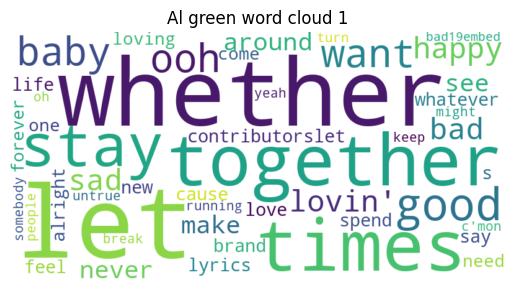

In [28]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Al green word cloud 1')

In [29]:
words_fc = pd.Series(wc.words_)
words_fc

let                1.000
whether            0.875
together           0.750
times              0.750
stay               0.625
good               0.500
want               0.375
baby               0.375
ooh                0.375
lovin'             0.375
bad                0.375
happy              0.375
sad                0.375
make               0.250
never              0.250
around             0.250
see                0.250
contributorslet    0.125
s                  0.125
lyrics             0.125
love               0.125
whatever           0.125
alright            0.125
cause              0.125
feel               0.125
brand              0.125
new                0.125
spend              0.125
life               0.125
say                0.125
loving             0.125
forever            0.125
need               0.125
one                0.125
come               0.125
running            0.125
untrue             0.125
yeah               0.125
somebody           0.125
people             0.125


Text(0.5, 1.0, 'skills frequency bar chart')

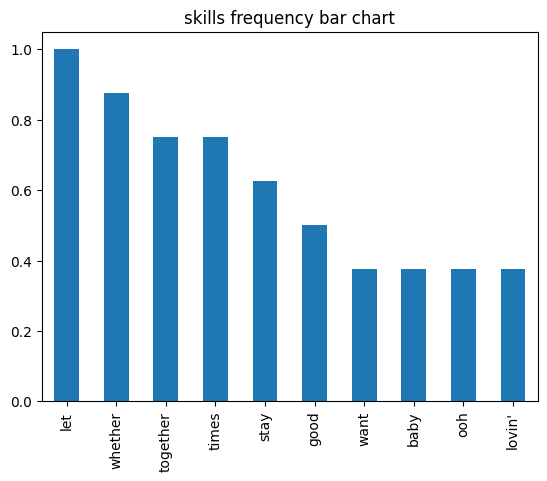

In [31]:
# words_fc =  np.ceil(words_fc * len(skills_clean))
words_fc[:10].plot.bar()
plt.title('skills frequency bar chart')

In [54]:
def get_top_15_words_by_frequency(row):
    lyrics = row['Song Lyrics']
    wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=15,
              width=800, height=400, collocations=False)
    wc.generate(lyrics)
    words_fc = pd.Series(wc.words_)
    top_15_words = list(words_fc[:15].index)
    top_15_string = ' '.join(top_15_words)
    return top_15_string

In [53]:
get_top_15_words_by_frequency(df['Song Lyrics'][1])

'love happiness yeah make heh say wrong power right ohh together wait minute good moan'

In [51]:
top15_words = list(words_fc[:15].index)

In [52]:
top15_string = ' '.join(top15_words)
top15_string

"let whether together times stay good want baby ooh lovin' bad happy sad make never"

In [55]:
def apply_top_15_words(df):
    df['top15'] = df.apply(
        lambda row: get_top_15_words_by_frequency(row),
        axis = 1
    )

In [56]:
apply_top_15_words(df)

In [57]:
df.head()

,Artist,Song Title,Full Title,Release Date,Year,Month,Day,Pageviews,url,featured_count,producer_count,writer_count,Song Lyrics,Artist Image,top15
0,Al Green,Let’s Stay Together,Let's Stay Together by Al Green,NaN,1971.0,11.0,NaN,279512,https://genius.com/Al-green-lets-stay-together...,0,1,3,39 contributorslet’s stay together lyrics let'...,https://s3.amazonaws.com/rapgenius/algreen_wid...,let whether together times stay good want baby...
1,Al Green,Love and Happiness,Love and Happiness by Al Green,1972-10-23,1972.0,10.0,23.0,74572,https://genius.com/Al-green-love-and-happiness...,0,1,2,16 contributorslove and happiness lyrics love ...,https://s3.amazonaws.com/rapgenius/algreen_wid...,love happiness yeah make heh say wrong power r...
2,Al Green,How Can You Mend a Broken Heart?,How Can You Mend a Broken Heart? by Al Green,1972-01-31,1972.0,1.0,31.0,72266,https://genius.com/Al-green-how-can-you-mend-a...,0,1,3,28 contributorshow can you mend a broken heart...,https://s3.amazonaws.com/rapgenius/algreen_wid...,mend broken heart live wanna stop tell yeah he...
3,Al Green,Tired of Being Alone,Tired of Being Alone by Al Green,NaN,1971.0,NaN,NaN,51103,https://genius.com/Al-green-tired-of-being-alo...,0,1,1,21 contributorstired of being alone lyrics swe...,https://s3.amazonaws.com/rapgenius/algreen_wid...,baby tired alone hey yeah say love ya sometime...
4,Al Green,Take Me to the River,Take Me to the River by Al Green,1974-10-02,1974.0,10.0,2.0,40948,https://genius.com/Al-green-take-me-to-the-riv...,0,1,2,7 contributorstake me to the river lyrics i'd ...,https://s3.amazonaws.com/rapgenius/algreen_wid...,know love wanna wash water river take put tell...


In [58]:
sum_string = ' '.join(df['top15'].str.lower())

In [59]:
len(sum_string)

17592

Text(0.5, 1.0, 'Soul wc')

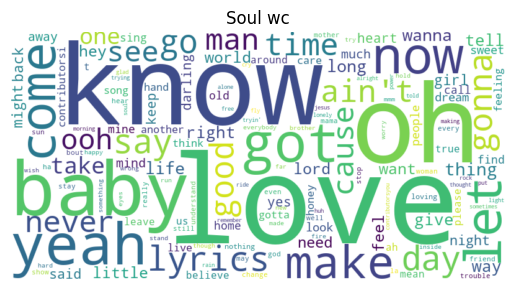

In [60]:
sum_wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=150,
              width=800, height=400, collocations=False)
sum_wc.generate(sum_string)
plt.imshow(sum_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Soul wc')

In [ ]:
sum_words_fc = pd.Series(sum_wc.words_)
sum_words_fc =  np.ceil(words_fc * len(skills_clean))
words_fc[:20].plot.bar()
plt.title('skills frequency bar chart')